In [1]:
### set environment
import numpy as np
import pandas as pd
import argparse
import os

from sklearn.datasets import fetch_openml
from sklearn.decomposition import PCA

# Dimension reduction and clustering libraries
import umap
import phenograph

import matplotlib.pyplot as plt

In [2]:
txt_fdiry = "/mount/repo/Proj_ENCODE_FCC/results/region_annotation/fcc_astarr_macs_input_overlap/summary2"
txt_fname = "matrix.mca_var70.prepare.cres_vote1_gcfilter.chipseq_full.fcc.tss.tsv"
txt_fpath = os.path.join(txt_fdiry, txt_fname)

mat = pd.read_csv(txt_fpath, sep="\t")
vec = mat.Region
mat = mat.set_index('Region')

mat_region_annot_fcc = mat
print(mat.shape)
mat.head()

(87610, 180)


,Dim 1,Dim 2,Dim 3,Dim 4,Dim 5,Dim 6,Dim 7,Dim 8,Dim 9,Dim 10,...,Dim 171,Dim 172,Dim 173,Dim 174,Dim 175,Dim 176,Dim 177,Dim 178,Dim 179,Dim 180
Region,,,,,,,,,,,,,,,,,,,,,
chr1:10038-10405,-0.292088,0.059655,0.089723,0.097001,0.011637,0.046208,-0.019806,-0.026412,-0.014344,-0.041516,...,0.020051,0.002605,0.082591,-0.038212,-0.080441,-0.000003,-0.038538,0.005645,0.072115,0.023875
chr1:16025-16338,-0.305400,0.025167,0.079964,0.033147,0.049147,-0.010955,0.007740,-0.014363,-0.012421,-0.016394,...,0.000266,0.001665,0.007894,0.006690,-0.007339,0.002074,-0.000393,-0.001908,0.010637,-0.006100
chr1:115429-115969,0.190458,0.027125,-0.363422,0.154789,-0.045888,0.045505,-0.078477,-0.024006,-0.020143,0.133306,...,-0.010027,-0.039760,-0.000153,0.007521,0.020743,-0.031246,0.004313,-0.037045,-0.047817,-0.029354
chr1:184091-184563,-0.269308,-0.000900,0.079841,0.016058,0.039529,0.052123,-0.050647,-0.049007,-0.001533,-0.000329,...,0.014451,-0.003759,0.000945,-0.002733,-0.005914,-0.007062,-0.006278,0.002369,-0.004578,0.005193
chr1:186343-187136,-0.310584,0.028839,0.077317,0.031967,0.048625,0.007525,-0.039138,-0.027489,0.003972,-0.001530,...,0.002114,0.000285,0.006193,0.007745,-0.003977,0.005877,-0.000120,-0.001757,0.008775,-0.000713


In [3]:
X = mat_region_annot_fcc.to_numpy()
#X = X[:,:100]
X.shape

(87610, 180)

/opt/conda/lib/python3.11/site-packages/umap/umap_.py:1945: UserWarning: n_jobs value 1 overridden to 1 by setting random_state. Use no seed for parallelism.
  warn(f"n_jobs value {self.n_jobs} overridden to 1 by setting random_state. Use no seed for parallelism.")
OMP: Info #276: omp_set_nested routine deprecated, please use omp_set_max_active_levels instead.


CPU times: user 5min 3s, sys: 1min 42s, total: 6min 45s
Wall time: 3min 33s


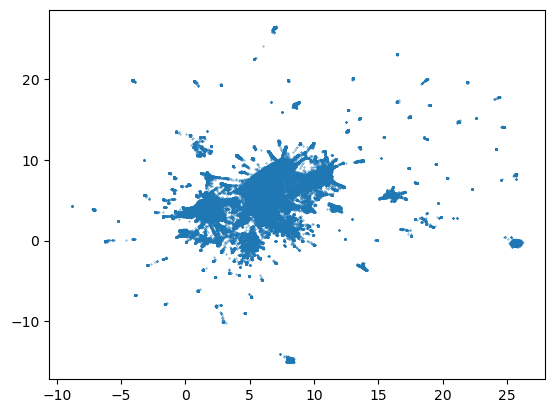

In [4]:
%%time
X_ump = umap.UMAP(n_neighbors=30, metric = "euclidean", random_state=123).fit_transform(X)
plt.scatter(X_ump[:, 0], X_ump[:, 1], s=0.1)

/opt/conda/lib/python3.11/site-packages/umap/umap_.py:1945: UserWarning: n_jobs value 1 overridden to 1 by setting random_state. Use no seed for parallelism.
  warn(f"n_jobs value {self.n_jobs} overridden to 1 by setting random_state. Use no seed for parallelism.")


CPU times: user 40.6 s, sys: 4.1 s, total: 44.7 s
Wall time: 38.8 s


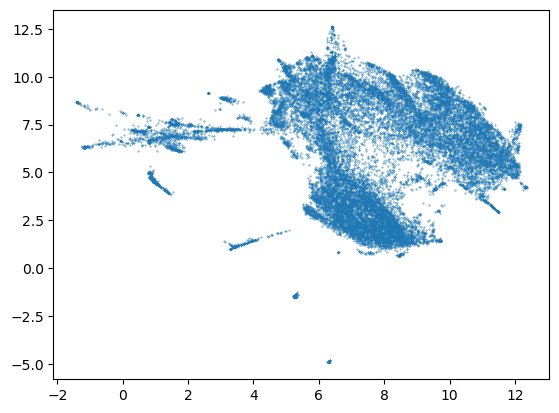

In [27]:
%%time
X_ump = umap.UMAP(n_neighbors=50, metric = "euclidean", random_state=123).fit_transform(X)
plt.scatter(X_ump[:, 0], X_ump[:, 1], s=0.1)

In [ ]:
%%time
X_ump = umap.UMAP(metric = "manhattan", random_state=123).fit_transform(X)
plt.scatter(X_ump[:, 0], X_ump[:, 1], s=0.1)